<a href="https://colab.research.google.com/github/khairulsholech/google-collab/blob/main/Image_classification_with_Gaussian_Distribution_%26_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GaussianNoise, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define input shape
input_shape = x_train[0].shape

In [4]:
# Add Gaussian Noise to input images
gaussian_noise = GaussianNoise(0.1)
x_train = gaussian_noise(x_train)
x_test = gaussian_noise(x_test)

In [5]:
# One-hot encode target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Define model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [7]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train model
batch_size = 16
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/5
3125/3125 [==============================] - 134s 43ms/step - loss: 1.4784 - accuracy: 0.4656 - val_loss: 1.1323 - val_accuracy: 0.5959
Epoch 2/5
3125/3125 [==============================] - 127s 41ms/step - loss: 1.1442 - accuracy: 0.5951 - val_loss: 1.0084 - val_accuracy: 0.6422
Epoch 3/5
3125/3125 [==============================] - 129s 41ms/step - loss: 1.0193 - accuracy: 0.6424 - val_loss: 1.0102 - val_accuracy: 0.6473
Epoch 4/5
3125/3125 [==============================] - 133s 42ms/step - loss: 0.9336 - accuracy: 0.6697 - val_loss: 0.9259 - val_accuracy: 0.6738
Epoch 5/5
3125/3125 [==============================] - 126s 40ms/step - loss: 0.8624 - accuracy: 0.6966 - val_loss: 0.9067 - val_accuracy: 0.6866


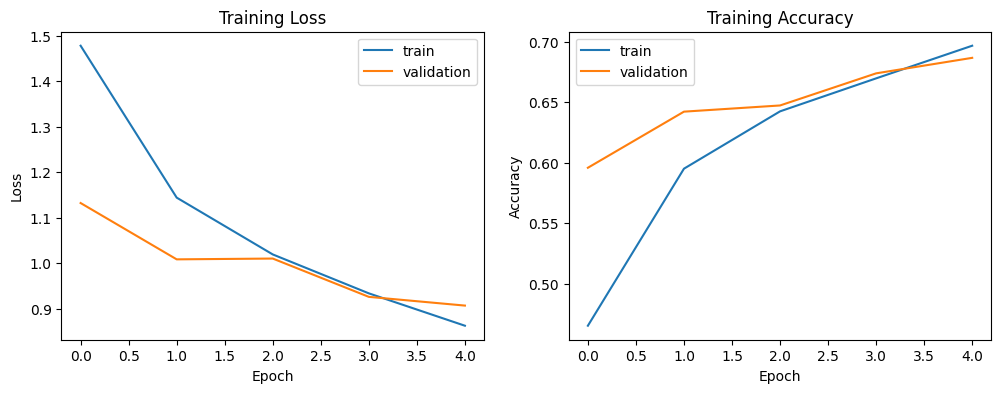

In [9]:
# Plot training history
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='validation')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='validation')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')
ax[1].legend()

plt.show()

313/313 [==============================] - 7s 21ms/step - loss: 0.9067 - accuracy: 0.6866


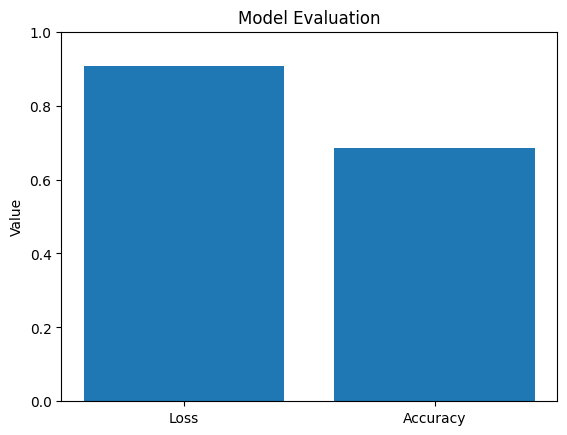

In [10]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test)

# Plot loss and accuracy
fig, ax = plt.subplots()
ax.bar(['Loss', 'Accuracy'], [loss, accuracy])
ax.set_ylim([0, 1])
ax.set_ylabel('Value')
ax.set_title('Model Evaluation')
plt.show()